In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


***Read Data***

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.


In [2]:
hotel=pd.read_csv('hotel_bookings.csv')

In [3]:
hotel.head(10)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [4]:
hotel.shape

(119390, 32)

In [5]:
hotel.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Column company gives the company ID through which the booking was made. 
It is not very useful in our analysis and has max NAs. Hence we drop it

In [6]:
#hotel.company.unique()
hotel=hotel.drop(columns='company')     

Replacing the NAs in the columns

In [7]:
replace_na = {"children": 0.0,"country": "Unknown", "agent": 0 }  
hotel = hotel.fillna(replace_na)

In [8]:
hotel.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [9]:
hotel.loc[hotel["adults"]         
                   + hotel["children"]
                   + hotel["babies"]==0].count()



hotel                             180
is_canceled                       180
lead_time                         180
arrival_date_year                 180
arrival_date_month                180
arrival_date_week_number          180
arrival_date_day_of_month         180
stays_in_weekend_nights           180
stays_in_week_nights              180
adults                            180
children                          180
babies                            180
meal                              180
country                           180
market_segment                    180
distribution_channel              180
is_repeated_guest                 180
previous_cancellations            180
previous_bookings_not_canceled    180
reserved_room_type                180
assigned_room_type                180
booking_changes                   180
deposit_type                      180
agent                             180
days_in_waiting_list              180
customer_type                     180
adr         

Some rows have 0 of adults, children and babies. We need to drop those rows

In [10]:
no_guests=list(hotel.loc[hotel["adults"]
                   + hotel["children"]
                   + hotel["babies"]==0].index)
no_guests

hotel.drop(hotel.index[no_guests], inplace=True)

In [11]:
hotel.shape

(119210, 31)

In [12]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Eliminate columns from the data that are not needed in the analysis. 

In [13]:


hotel=hotel.drop(columns=['arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights',  'stays_in_week_nights',
                'is_repeated_guest', 'previous_cancellations','previous_bookings_not_canceled','booking_changes','agent',
                'days_in_waiting_list','required_car_parking_spaces', 'reservation_status_date'])


In [14]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,2,0.0,0,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,0.0,0,Check-Out
1,Resort Hotel,0,737,2015,July,2,0.0,0,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,0.0,0,Check-Out
2,Resort Hotel,0,7,2015,July,1,0.0,0,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,75.0,0,Check-Out
3,Resort Hotel,0,13,2015,July,1,0.0,0,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,75.0,0,Check-Out
4,Resort Hotel,0,14,2015,July,2,0.0,0,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,98.0,1,Check-Out


In [15]:
hotel.describe()  #Should not be considered for is_canceled and  arrival_date_year since they are binary
                  

,is_canceled,lead_time,arrival_date_year,adults,children,babies,adr,total_of_special_requests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,1.859206,0.104043,0.007961,101.969092,0.571504
std,0.483012,106.875450,0.707485,0.575186,0.398836,0.097509,50.434007,0.792876
min,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000,-6.380000,0.000000
25%,0.000000,18.000000,2016.000000,2.000000,0.000000,0.000000,69.500000,0.000000
50%,0.000000,69.000000,2016.000000,2.000000,0.000000,0.000000,94.950000,0.000000
75%,1.000000,161.000000,2017.000000,2.000000,0.000000,0.000000,126.000000,1.000000
max,1.000000,737.000000,2017.000000,55.000000,10.000000,10.000000,5400.000000,5.000000


'adr' has a minimum of -6, which is an outlier and not possible to go below zero. Hence we drop those values

In [16]:
hotel.drop(hotel[hotel['adr']<0].index, axis=0, inplace=True)

In [19]:
hotel.shape

(119209, 19)


***EDA***


In [ ]:
hotel['hotel'].value_counts()     


City Hotels are more in number, maybe because Resort hotels is reserved mainly just by vacationers
City hotels are used by not just people on holidays, but also business travelers, etc.

In [20]:
hotel['is_canceled'].value_counts() # 0 is not canceled, 1 is bookings that are canceled

0    75010
1    44199
Name: is_canceled, dtype: int64

In [21]:
hotel.groupby(['hotel','is_canceled']).size()

hotel         is_canceled
City Hotel    0              46084
              1              33079
Resort Hotel  0              28926
              1              11120
dtype: int64

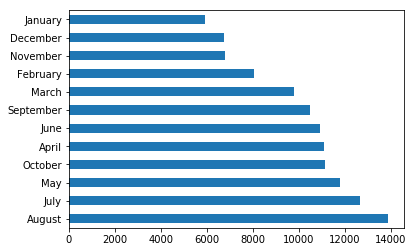

In [22]:
month_plot=hotel['arrival_date_month'].value_counts().plot.barh()


The result shows that there are more bookings in May, July and August(Summer)

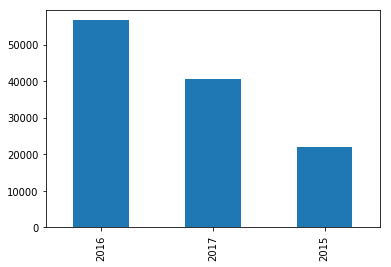

In [23]:
year_plot=hotel['arrival_date_year'].value_counts().plot.bar()


Maximum bookings were in the year of 2017

In [24]:
hotel['market_segment'].value_counts()  #Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means 
                                        #“Tour Operators”

Online TA        56408
Offline TA/TO    24182
Groups           19790
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: market_segment, dtype: int64

Online and Off-line travel agents do most of the bookings

In [25]:
hotel['distribution_channel'].value_counts()  #Booking distribution channel. The term “TA” means “Travel Agent

TA/TO        97750
Direct       14610
Corporate     6651
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [26]:
hotel_by_month=hotel.groupby(['arrival_date_month','hotel']).size()
hotel_by_month=hotel_by_month.to_frame().reset_index()


In [27]:
hotel_by_month.rename(columns= {0: 'count'})

,arrival_date_month,hotel,count
0,April,City Hotel,7469
1,April,Resort Hotel,3609
2,August,City Hotel,8967
3,August,Resort Hotel,4894
4,December,City Hotel,4114
5,December,Resort Hotel,2645
6,February,City Hotel,4950
7,February,Resort Hotel,3102
8,January,City Hotel,3730
9,January,Resort Hotel,2191


The maximum bookings were made in the month of August(Type-City hotel)

In [28]:
hotel_by_month.to_excel("hotel_by_month.xlsx") 

In [29]:
hotel['meal'].value_counts()   #BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – 
                                #usually dinner); FB – Full board (breakfast, lunch and dinner); 
                                #Undefined/SC – no meal package

BB           92235
HB           14458
SC           10549
Undefined     1169
FB             798
Name: meal, dtype: int64

Most of the visitors prefer Bed&Breakfast kind of booking!

In [30]:
hotel['customer_type'].value_counts()

Transient          89476
Transient-Party    25087
Contract            4072
Group                574
Name: customer_type, dtype: int64

Contract - when the booking has an allotment or other type of contract associated to it\
Group – when the booking is associated to a group\
Transient – when the booking is not part of a group or contract, and is not associated to other transient booking\ Transient-party – when the booking is transient, but is associated to at least other transient booking


***Further Analysis***

**Which countries do the visitors belong to?**

In [ ]:
hotel.country.unique()

In [ ]:
hotel['country'].value_counts().head(10)    #There are the total guests that booked the hotel roomed. This includes both 
                                            #cancelled and not_cancelled bookings

In [ ]:
#Count after considering just the non cancelled bookings
country_count=hotel.loc[hotel["is_canceled"] == 0]["country"].value_counts().to_frame()
country_count


In [ ]:
country_count.rename(columns={"country": "No. of Visitors"}, inplace=True)
total_visitors=country_count['No. of Visitors'].sum()

In [ ]:
country_count["Percentage of Visitors"] = country_count["No. of Visitors"] / total_visitors * 100
country_count["Percentage of Visitors"]=round(country_count["Percentage of Visitors"], 2)

In [ ]:

country_count.index.name = "country"
country_count

About 28% of the visitors are from Portugal, 13% from UK and 10 are from France

In [ ]:
country_count.to_excel("Country_Visitors.xlsx") 

**Average Daily Price with respect to the room type**

In [ ]:
hotel['reserved_room_type'].value_counts()  #This shows the Code of room type reserved. Code is presented instead of designation 
                                            #for anonymity reasons.

In [ ]:
hotel.boxplot(column='adr', return_type='axes')

In [ ]:
hotel.drop(hotel[hotel['adr']>5000].index, axis=0, inplace=True)
hotel.boxplot(column='adr', return_type='axes')

In [31]:
df_price = hotel.groupby('reserved_room_type')['adr'].agg({'Average_Price':'mean', 'No_of_Bookings':'size'})
df_price.reset_index(inplace=True)

df_price

/Users/tanushreeshetty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,reserved_room_type,Average_Price,No_of_Bookings
0,A,90.912277,85872
1,B,90.553103,1115
2,C,160.388883,931
3,D,120.809258,19179
4,E,124.778429,6519
5,F,167.863483,2894
6,G,176.164283,2092
7,H,188.223111,601
8,L,124.666667,6


Roomtype D has the maximum number of bookings and is not the most expensive room.
Roomtype A has the secondbest no of bookings and has relatively cheap daily rate.

In [ ]:
df_price.to_excel("Roomtype&Price&Bookings.xlsx") 